In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Creating the data frame
df = pd.read_csv('frmgham2.csv')
df.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,2448,1,209.0,52,121.0,66.0,0,0.0,NaN,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,6238,2,260.0,52,105.0,69.5,0,0.0,29.43,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
4,6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    11627 non-null  int64  
 1   SEX       11627 non-null  int64  
 2   TOTCHOL   11218 non-null  float64
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   CURSMOKE  11627 non-null  int64  
 7   CIGPDAY   11548 non-null  float64
 8   BMI       11575 non-null  float64
 9   DIABETES  11627 non-null  int64  
 10  BPMEDS    11034 non-null  float64
 11  HEARTRTE  11621 non-null  float64
 12  GLUCOSE   10187 non-null  float64
 13  educ      11332 non-null  float64
 14  PREVCHD   11627 non-null  int64  
 15  PREVAP    11627 non-null  int64  
 16  PREVMI    11627 non-null  int64  
 17  PREVSTRK  11627 non-null  int64  
 18  PREVHYP   11627 non-null  int64  
 19  TIME      11627 non-null  int64  
 20  PERIOD    11627 non-null  in

In [4]:
df.PERIOD.value_counts()

PERIOD
1    4434
2    3930
3    3263
Name: count, dtype: int64

In [5]:
df.ANYCHD.value_counts()

ANYCHD
0    8469
1    3158
Name: count, dtype: int64

In [6]:
df2 = df[["SEX","TOTCHOL", "AGE", "SYSBP", "DIABP", "CURSMOKE", 
                "CIGPDAY", "BMI", "DIABETES", "BPMEDS", "HEARTRTE", "GLUCOSE", "educ",
               "PREVCHD", "PREVAP", "PREVMI", "PREVSTRK", "PREVHYP", "HDLC", "LDLC", "ANYCHD", "PERIOD"]].copy()

In [7]:
df2 = df2[(df2.PERIOD == 3)] 

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3263 entries, 1 to 11626
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEX       3263 non-null   int64  
 1   TOTCHOL   3049 non-null   float64
 2   AGE       3263 non-null   int64  
 3   SYSBP     3263 non-null   float64
 4   DIABP     3263 non-null   float64
 5   CURSMOKE  3263 non-null   int64  
 6   CIGPDAY   3249 non-null   float64
 7   BMI       3246 non-null   float64
 8   DIABETES  3263 non-null   int64  
 9   BPMEDS    2817 non-null   float64
 10  HEARTRTE  3259 non-null   float64
 11  GLUCOSE   2701 non-null   float64
 12  educ      3181 non-null   float64
 13  PREVCHD   3263 non-null   int64  
 14  PREVAP    3263 non-null   int64  
 15  PREVMI    3263 non-null   int64  
 16  PREVSTRK  3263 non-null   int64  
 17  PREVHYP   3263 non-null   int64  
 18  HDLC      3027 non-null   float64
 19  LDLC      3026 non-null   float64
 20  ANYCHD    3263 non-null   int64  


In [9]:
df2 = df2.drop(columns='PERIOD')

In [10]:
df2.shape

(3263, 21)

In [11]:
df2.head()

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,...,GLUCOSE,educ,PREVCHD,PREVAP,PREVMI,PREVSTRK,PREVHYP,HDLC,LDLC,ANYCHD
1,1,209.0,52,121.0,66.0,0,0.0,NaN,0,0.0,...,92.0,4.0,0,0,0,0,0,31.0,178.0,1
4,2,237.0,58,108.0,66.0,0,0.0,28.50,0,0.0,...,71.0,2.0,0,0,0,0,0,54.0,141.0,0
11,2,NaN,58,155.0,90.0,1,30.0,24.61,0,0.0,...,NaN,3.0,0,0,0,0,1,NaN,NaN,0
14,2,220.0,55,180.0,106.0,0,0.0,31.17,1,1.0,...,81.0,2.0,0,0,0,0,1,46.0,135.0,1
19,2,320.0,57,110.0,46.0,1,30.0,22.02,0,0.0,...,87.0,2.0,0,0,0,0,0,34.0,286.0,0


In [12]:
df2.dtypes

SEX           int64
TOTCHOL     float64
AGE           int64
SYSBP       float64
DIABP       float64
CURSMOKE      int64
CIGPDAY     float64
BMI         float64
DIABETES      int64
BPMEDS      float64
HEARTRTE    float64
GLUCOSE     float64
educ        float64
PREVCHD       int64
PREVAP        int64
PREVMI        int64
PREVSTRK      int64
PREVHYP       int64
HDLC        float64
LDLC        float64
ANYCHD        int64
dtype: object

In [13]:
for col in ['SEX','CURSMOKE', 'DIABETES', 'PREVCHD', 'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'ANYCHD']:
    df2[col] = df2[col].astype('category')

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3263 entries, 1 to 11626
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   SEX       3263 non-null   category
 1   TOTCHOL   3049 non-null   float64 
 2   AGE       3263 non-null   int64   
 3   SYSBP     3263 non-null   float64 
 4   DIABP     3263 non-null   float64 
 5   CURSMOKE  3263 non-null   category
 6   CIGPDAY   3249 non-null   float64 
 7   BMI       3246 non-null   float64 
 8   DIABETES  3263 non-null   category
 9   BPMEDS    2817 non-null   float64 
 10  HEARTRTE  3259 non-null   float64 
 11  GLUCOSE   2701 non-null   float64 
 12  educ      3181 non-null   float64 
 13  PREVCHD   3263 non-null   category
 14  PREVAP    3263 non-null   category
 15  PREVMI    3263 non-null   category
 16  PREVSTRK  3263 non-null   category
 17  PREVHYP   3263 non-null   category
 18  HDLC      3027 non-null   float64 
 19  LDLC      3026 non-null   float64 
 20  ANYCHD    32

In [15]:
df2.isnull().sum()

SEX           0
TOTCHOL     214
AGE           0
SYSBP         0
DIABP         0
CURSMOKE      0
CIGPDAY      14
BMI          17
DIABETES      0
BPMEDS      446
HEARTRTE      4
GLUCOSE     562
educ         82
PREVCHD       0
PREVAP        0
PREVMI        0
PREVSTRK      0
PREVHYP       0
HDLC        236
LDLC        237
ANYCHD        0
dtype: int64

In [16]:
import missingno as msno

<Axes: >

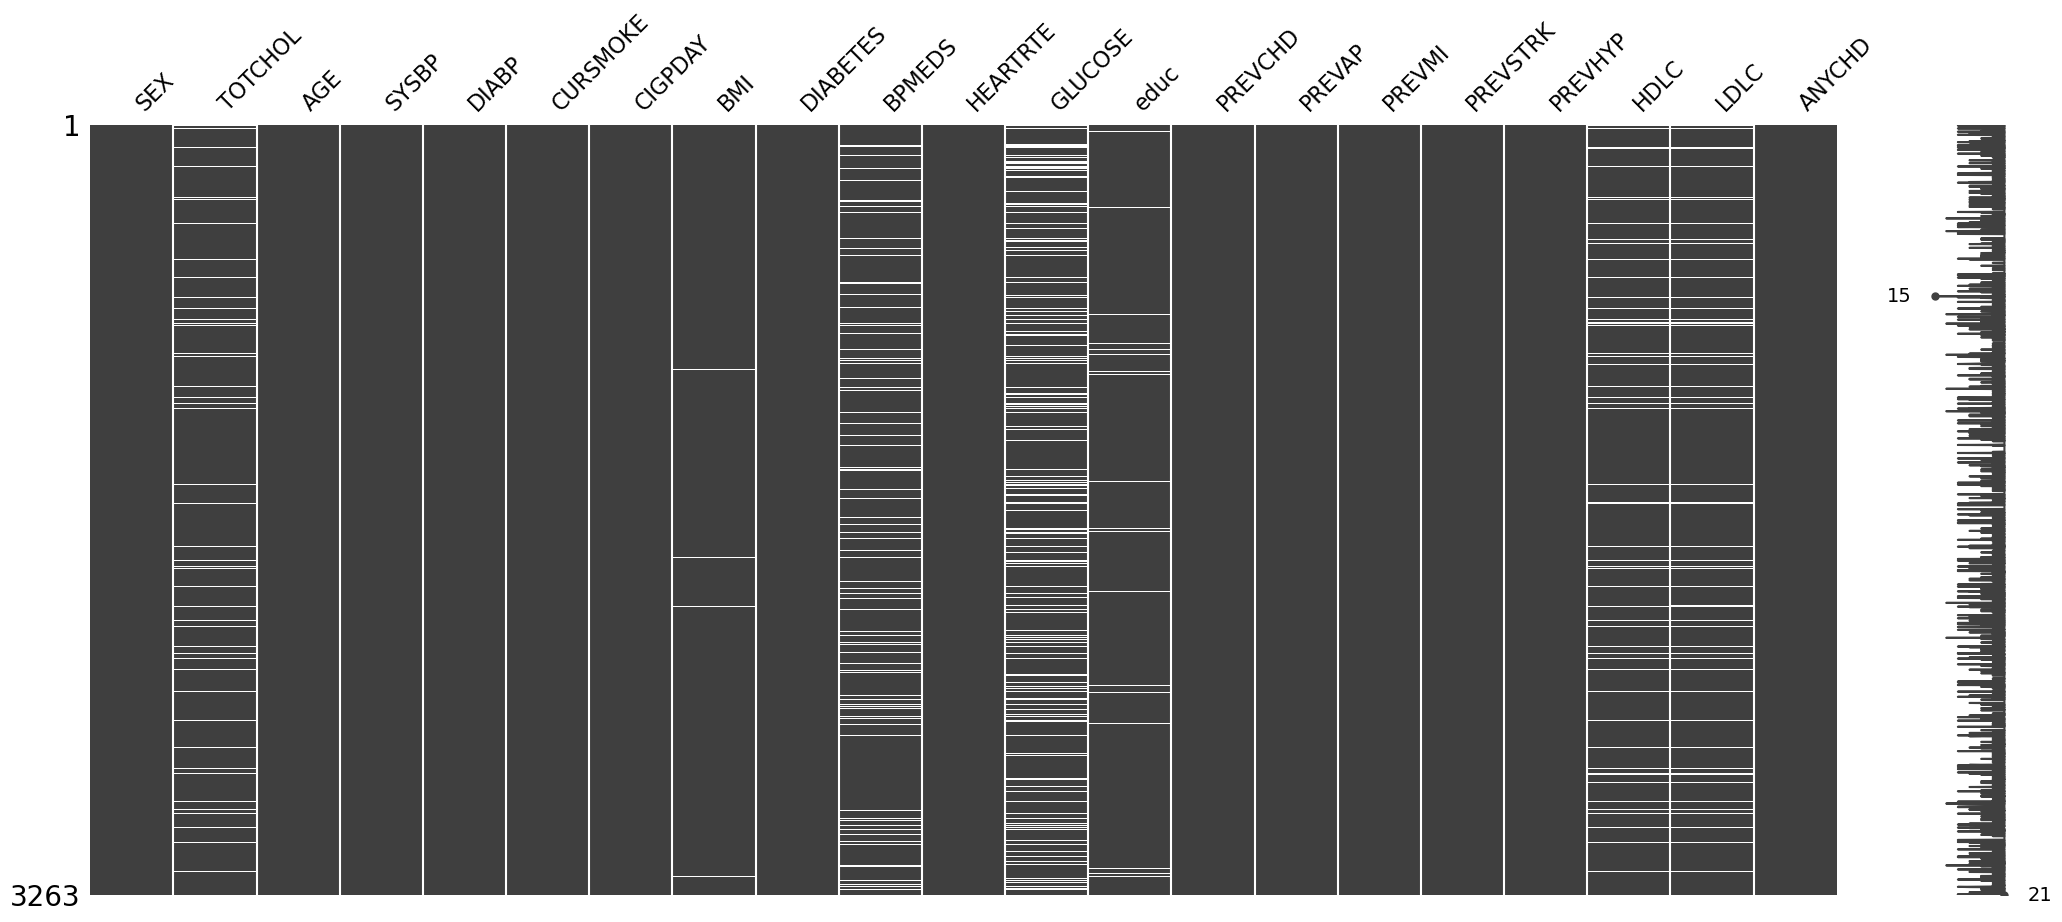

In [17]:
msno.matrix(df2)

<Axes: >

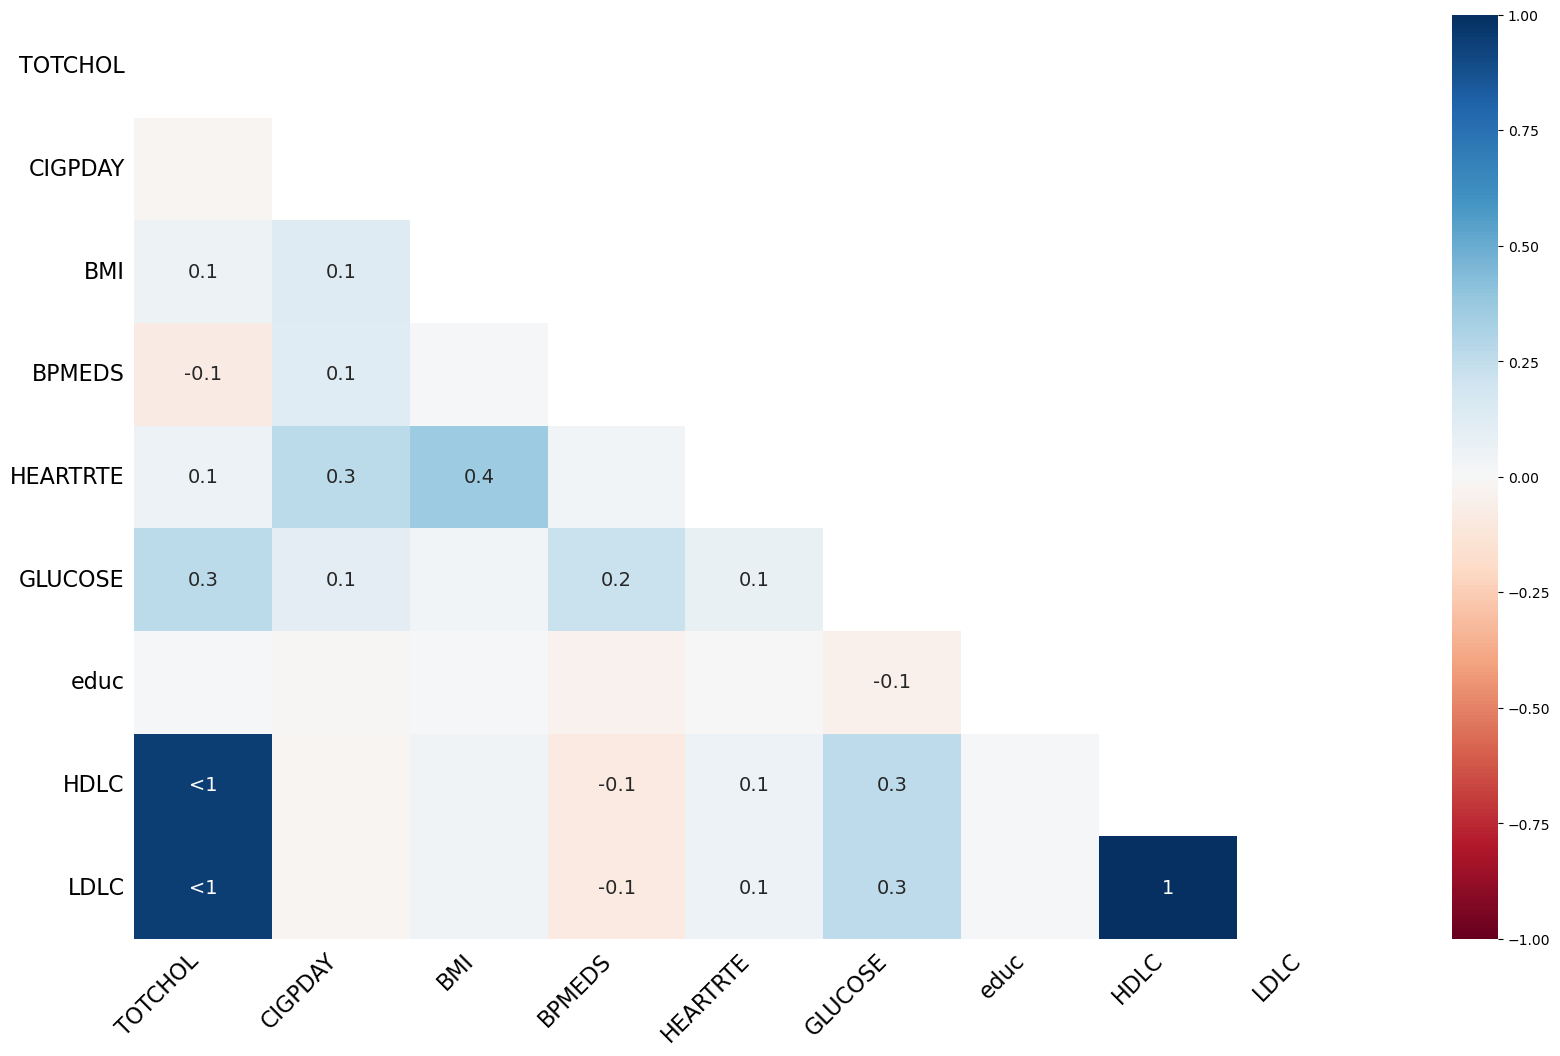

In [18]:
msno.heatmap(df2)